In [60]:
import pandas as pd 
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [48]:
df = pd.read_csv('hrdataset.csv')
df.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [49]:
retained = df[df.left == 0]
left = df[df.left == 1]
df.groupby('left').mean()

C:\Users\HP\AppData\Local\Temp\ipykernel_2916\1955720787.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('left').mean()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


<Axes: xlabel='salary,Department'>

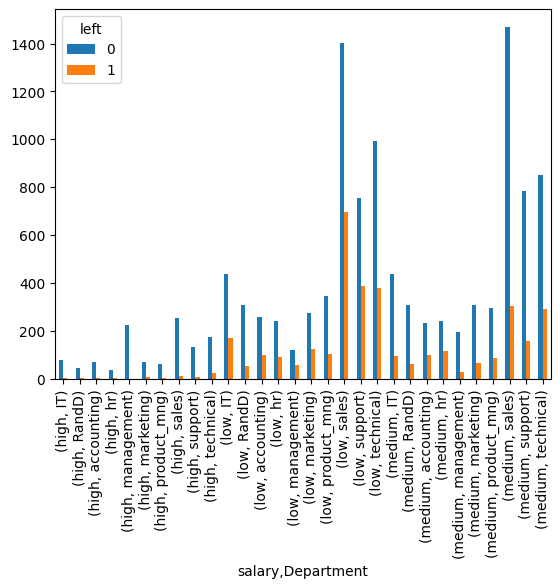

In [50]:
pd.crosstab([df.salary, df.Department], df.left).plot(kind = 'bar')

In [53]:
subdf = df[['satisfaction_level', 'average_montly_hours','promotion_last_5years', 'salary']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [54]:
salary_dummies = pd.get_dummies(subdf.salary, prefix = 'salary')

In [55]:
df_with_dummies = pd.concat([subdf, salary_dummies], axis=  "columns")
df_with_dummies

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0
...,...,...,...,...,...,...,...
14994,0.40,151,0,low,0,1,0
14995,0.37,160,0,low,0,1,0
14996,0.37,143,0,low,0,1,0
14997,0.11,280,0,low,0,1,0


In [56]:
df_with_dummies.drop('salary', axis='columns', inplace= True)
df_with_dummies.head(10)

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0
5,0.41,153,0,0,1,0
6,0.10,247,0,0,1,0
7,0.92,259,0,0,1,0
8,0.89,224,0,0,1,0
9,0.42,142,0,0,1,0


In [57]:
X = df_with_dummies

In [58]:
y = df.left

In [74]:
X_trian ,X_test , y_trian, y_test = train_test_split(X, y , train_size= 0.9)

In [72]:
model = LogisticRegression()

In [73]:
model.fit(X_trian, y_trian)

LogisticRegression()

In [76]:
model.predict(X_test)

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

In [77]:
model.score(X_test, y_test)

0.7693333333333333